In [1]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")  


import numpy as np
import pandas as pd
import nltk


In [2]:
df= pd.read_csv(r"D:/DAta science/Dataset/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df['Helpful%']=np.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
df['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
df['%upvote']=pd.cut(df['Helpful%'],bins=[-1,0,0.2,0.4,0.6,0.8,1], labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


# Exploratory Data Analysis

In [9]:
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %upvote                                                             
1     Empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [10]:
df_s=df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


Q1. Analyse for different scores..
Q2. Create Pivot table and heatmap of the above statement for the better 

In [11]:
pivot=df_s.pivot(index='%upvote',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='None-Score', ylabel='%upvote'>

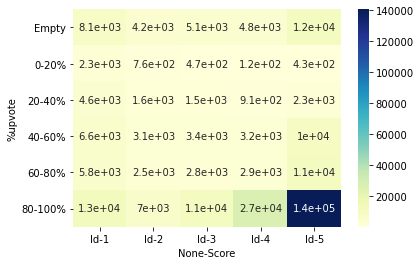

In [13]:
sns.heatmap(pivot,annot=True,cmap='YlGnBu')

#### Applying Bag of Words on our data
Fetch top 20 Positive words and top 20 Negative words

In [14]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [15]:
df2=df[df['Score']!=3]
df2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


In [16]:
x=df2['Text']

In [17]:
df2['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

In [18]:
y_dict = {1:0,2:0,4:1,5:1}
y = df2['Score'].map(y_dict)


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
c = CountVectorizer(stop_words='english')

In [21]:
x_c = c.fit_transform(x)

In [22]:
x_c.shape

(525814, 114969)

### Check Model Accuracy

In [23]:
#Split the data
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x_c,y)

In [25]:
X_train.shape

(394360, 114969)

In [26]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression


In [27]:
log = LogisticRegression()

In [28]:
ml=log.fit(X_train,y_train)

In [29]:
ml.score(X_test,y_test)

0.9361221415856498

In [30]:
w=c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [31]:
coef=ml.coef_.tolist()[0]
coef

[-0.412372897827241,
 -0.1364283263545456,
 0.4238984717356992,
 -0.005126027503663826,
 0.0019361902693462766,
 -0.011468694942176427,
 0.00028126497346502396,
 -0.008334112042791109,
 0.0,
 0.00036049058861765493,
 0.0,
 -0.009088037228157993,
 0.001206310839683934,
 0.0110247832311863,
 -0.13271983494912482,
 0.0015961173022999372,
 0.0022708488461420802,
 0.0,
 0.0017518901107856097,
 0.0,
 -0.03864952589382636,
 0.0,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 0.04046157643499104,
 -0.0003535884487139134,
 0.049427857581591184,
 0.0,
 0.0,
 0.0,
 0.00015406145066003865,
 0.0034223366074371967,
 0.10833418538362963,
 0.0,
 0.0,
 0.012193325826228434,
 9.192874524542192e-05,
 0.007200568406809514,
 -0.0705061040218017,
 8.752359474672195e-05,
 0.01226904414645619,
 7.604459417258001e-05,
 0.0,
 0.0,
 0.00020837302649534835,
 0.0,
 0.0,
 0.0353479127093

In [32]:
coef_df= pd.DataFrame({'Word':w,'Coefficient':coef})
coef_df

,Word,Coefficient
0,00,-0.412373
1,000,-0.136428
2,0000,0.423898
3,000001,-0.005126
4,00001,0.001936
...,...,...
114964,çaykur,0.000851
114965,çelem,-0.123465
114966,être,0.000000
114967,île,0.010539


In [33]:
#Sorting the dataframe on the basis of Coefficient
coef_df.sort_values(['Coefficient','Word'],ascending=False)

,Word,Coefficient
80600,pleasantly,4.205061
39072,downside,3.368906
94667,skeptical,3.148594
5865,addicting,2.755681
54130,hesitant,2.513056
...,...,...
113164,worst,-3.145474
24949,cancelled,-3.146366
106852,unacceptable,-3.244004
34989,deceptive,-3.388487


In [34]:
#Top 20 Positive words
coef_df.head(20)

,Word,Coefficient
0,00,-0.412373
1,000,-0.136428
2,0000,0.423898
3,000001,-0.005126
4,00001,0.001936
5,000013,-0.011469
6,0000soo,0.000281
7,0001,-0.008334
8,000111052,0.000000
9,0002251337,0.000360


In [35]:
#Top 20 negative words
coef_df.tail(20)

,Word,Coefficient
114949,zyrtec,0.002736
114950,zyto,0.021222
114951,zz,0.131147
114952,zzigae,0.000780
114953,zzz,0.000000
114954,zzzz,0.001017
114955,zzzzz,0.237194
114956,zzzzzz,0.000036
114957,zzzzzzz,-0.021623
114958,zzzzzzzz,0.011651


# Automating NLP and ML Model

In [36]:
#It will receive independent data y and nlp model(applying bag of words on the data)
def text_fit(X,y,nlp_model,ml_model,coef_show=1):
    x_c=nlp_model.fit_transform(X)
    print('features:{}'.format(x_c.shape[1]))
    
    #Splitting the data
    X_train,X_test,y_train,y_test = train_test_split(x_c,y)
    
    #Applying machine learning model
    ml = ml_model.fit(X_train,y_train)
    
    #Accuracy Score
    acc=ml.score(X_test, y_test)
    print(acc)
    
      
    if coef_show==1:
        w=c.get_feature_names()
        coef = ml.coef_.tolist()[0]
        #Creating a dataFrame
        coef_df=pd.DataFrame({"Word":w,'Coefficient':coef})

        #Sorting the dataframe
        coef_df=coef_df.sort_values(['Coefficient','Word'],ascending=False)
        print('\n')
        print("Top 20 Positive words")
        print(coef_df.head(20))
        print('\n')
        print("Top 20 Negative words")
        print(coef_df.tail(20))

In [37]:
#NLP technique as Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
c=CountVectorizer(stop_words='english')

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
text_fit(x,y,c,LogisticRegression( ))

features:114969
0.9357722092899418


Top 20 Positive words
                Word  Coefficient
80600     pleasantly     4.068511
39072       downside     3.256277
94667      skeptical     3.231796
55029         hooked     3.205944
54130       hesitant     2.861844
113138       worries     2.784665
5865       addicting     2.776748
39214       drawback     2.597879
35726         delish     2.487114
102857      terrific     2.440710
35691      delighted     2.428882
87967         resist     2.345924
58320         intend     2.337820
40135        easiest     2.280887
113137       worried     2.278172
38394         divine     2.264436
103080      thankful     2.258810
82404   prescription     2.214799
40342     economical     2.198078
111520       welcome     2.162709


Top 20 Negative words
                  Word  Coefficient
57122     inconsistent    -2.569113
37563   disappointment    -2.622087
110404         vomited    -2.624450
50059          glowing    -2.635411
106940      unbearable 

## Automate Predicition 
create function to predict confusion matrix, accuracy 

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(x,y,nlp_model,ml_model):
    x_c=nlp_model.fit_transform(x)
    X_train,X_test,y_train,y_test=train_test_split(x_c,y)
    ml = ml_model.fit(X_train,y_train)
    predictions= ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [42]:
c=CountVectorizer()
lr=LogisticRegression()

In [43]:
predict(x,y,c,lr)

[[ 15113   2677]
 [  5457 108207]]
0.9381228414502412


## Applying Algorithms of NLP and Machine Learning.

In [44]:
from sklearn.dummy import DummyClassifier

In [45]:
c=CountVectorizer()

In [46]:
text_fit(x,y,c,DummyClassifier(),0)

features:115282
0.8441964489479209


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfidf=TfidfVectorizer(stop_words='english')

In [49]:
lr=LogisticRegression()

In [50]:
text_fit(x,y,tfidf,lr,0)

features:114969
0.9340301550352215


#### Predicition using ML model

In [51]:
predict(x,y,c,lr)

[[ 15210   2785]
 [  5405 108054]]
0.9376968369163358


In [52]:
#Similarly for RandomForest,KNN algo can be implementes

#### Data Preparation for predicting the upvotes

In [53]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [54]:
data=df[df['Score']==5]

In [55]:
data['%upvote'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [56]:
data2=data[data['%upvote'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]

In [57]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%


In [58]:
X=data2['Text']

In [59]:
data2['%upvote'].unique()

['80-100%', '60-80%', '20-40%', '0-20%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [60]:
#Convert this to classification statement

In [ ]:
y_dict={'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
#y=data['%upvote'].map(y_dict)
y = data2['%upvote'].map(y_dict)

In [62]:
y.value_counts()

1.0    151721
0.0      2707
Name: %upvote, dtype: int64

#### Apply NLP technique TFIDF on the data

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tf=TfidfVectorizer()

In [73]:
X_c=tf.fit_transform(X)

# 1.Apply Techniques of Handling Imbalance Data.
2. Doing Cross validation using GridSearchCv and then predict
3.Checking Accuracy of the CrossValidation Model


In [74]:
!pip install Tensorflow

In [75]:
!pip install imbalanced-learn

In [76]:
from imblearn.over_sampling import RandomOverSampler

In [77]:
os= RandomOverSampler()

In [78]:
X_train_res,y_train_res = os.fit_resample(X_c,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_train_res.shape

In [ ]:
y_train_res.shape

In [ ]:
from collections import Counter

In [ ]:
print("Original Dataset shape {}".format(Counter(y)))
print("Resampled Dataset shape{}".format(Counter(y_train_res)))

# Cross validation using GridSearchCv and then predict


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_class=LogisticRegression()

In [ ]:
np.arange(-2,3)

In [ ]:
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf= GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')

In [ ]:
clf.fit(X_train_res,y_train_res)

#### Predicting 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_C,y)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
#Finding condusion matrix and acc
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
accuracy_score(y_test,pred)

It's a very good model, it doesn't cause over fitting because we have performed GridSearchCV